In [1]:
import torch
from lucent.modelzoo import vgg19, util
from cadena_model_vgg import VggModel
from lucent.optvis import render, param, transform, objectives

import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt

from correlations import correlations

##########################################

neurons_per_roi = {1: 43,   # Key: Roi number    Values: number of active neurons
 2: 62,
 3: 55,
 4: 50,
 5: 51,
 7: 53,
 8: 60,
 9: 43,
 10: 44,
 11: 53,
 12: 29,
 13: 17,
 14: 24,
 15: 59,
 16: 24,
 }


#########################################

dictionary_losses = {}

list_of_models_to_generate_output = []

for i in glob('Results/**/*.pt', recursive=True):

    file_name = i.rsplit('/', 1)[-1].rsplit('.', 1)[0]
    
    # What hyperparameters I want to see?   ['0.001', '0.001', '0.01']
    if file_name.split('_')[9:14:2] == ['0.001', '0.001', '0.01']:
        list_of_models_to_generate_output.append(os.path.abspath(i))
        #print(file_name)
        #print(file_name.split('_')[9:14:2])
        string_roi_layer = '_'.join(file_name.split('_')[2:4])
        #print(string_roi_layer)

        if '_'.join(string_roi_layer) not in dictionary_losses.keys():
            dictionary_losses[string_roi_layer] = []

        dictionary_losses[string_roi_layer].append(file_name.split('_')[7])

        #print(file_name.split('_')[7])
        #print('\n\n')


In [2]:
list(dictionary_losses.keys())

['7_12',
 '14_30',
 '13_28',
 '4_10',
 '9_14',
 '15_32',
 '12_32',
 '9_10',
 '11_23',
 '8_10',
 '9_5',
 '8_21',
 '12_21',
 '16_28',
 '15_34',
 '13_34',
 '7_19',
 '9_30',
 '12_23',
 '13_32',
 '9_16',
 '10_16',
 '10_23',
 '3_16',
 '9_19',
 '8_12',
 '14_34',
 '9_28',
 '8_16',
 '9_7',
 '8_5',
 '7_21',
 '12_25',
 '9_21',
 '9_12',
 '3_12',
 '7_7',
 '7_23',
 '9_23',
 '3_14',
 '3_10',
 '16_32',
 '13_25',
 '11_25',
 '10_19',
 '7_10',
 '4_12',
 '12_28',
 '11_19',
 '14_32',
 '16_30',
 '4_5',
 '8_25',
 '7_16',
 '11_21',
 '8_23',
 '15_28',
 '13_30',
 '12_30',
 '7_14',
 '14_28',
 '4_14',
 '3_7',
 '10_21',
 '14_25',
 '8_14',
 '15_30',
 '7_5',
 '8_7',
 '9_25',
 '4_7',
 '8_19']

In [3]:
list(dictionary_losses.keys()).index('7_12')

0

7 12 0.06909717729559967
/home/jose/Desktop/lucent-things/Results/ROI_7_Layer_12/ROI_7_Layer_12_0_Vgg/Vgg_model_7_12_epoch_9_loss_0.06909717729559967_sparsity_0.001_smoothness_0.001_groupsparsity_0.01.pt


/home/jose/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jose/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


conv_layer:   12 <class 'int'>
FTE:          [0, 2, 5, 7, 10, 12, 14, 16, 19, 21, 23, 25, 28, 30, 32, 34]
conv in FTE True



features.12
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[256, 56, 56, 53]
conv_layer:   12 <class 'int'>
FTE:          [0, 2, 5, 7, 10, 12, 14, 16, 19, 21, 23, 25, 28, 30, 32, 34]
conv in FTE True



features.12
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[256, 56, 56, 53]


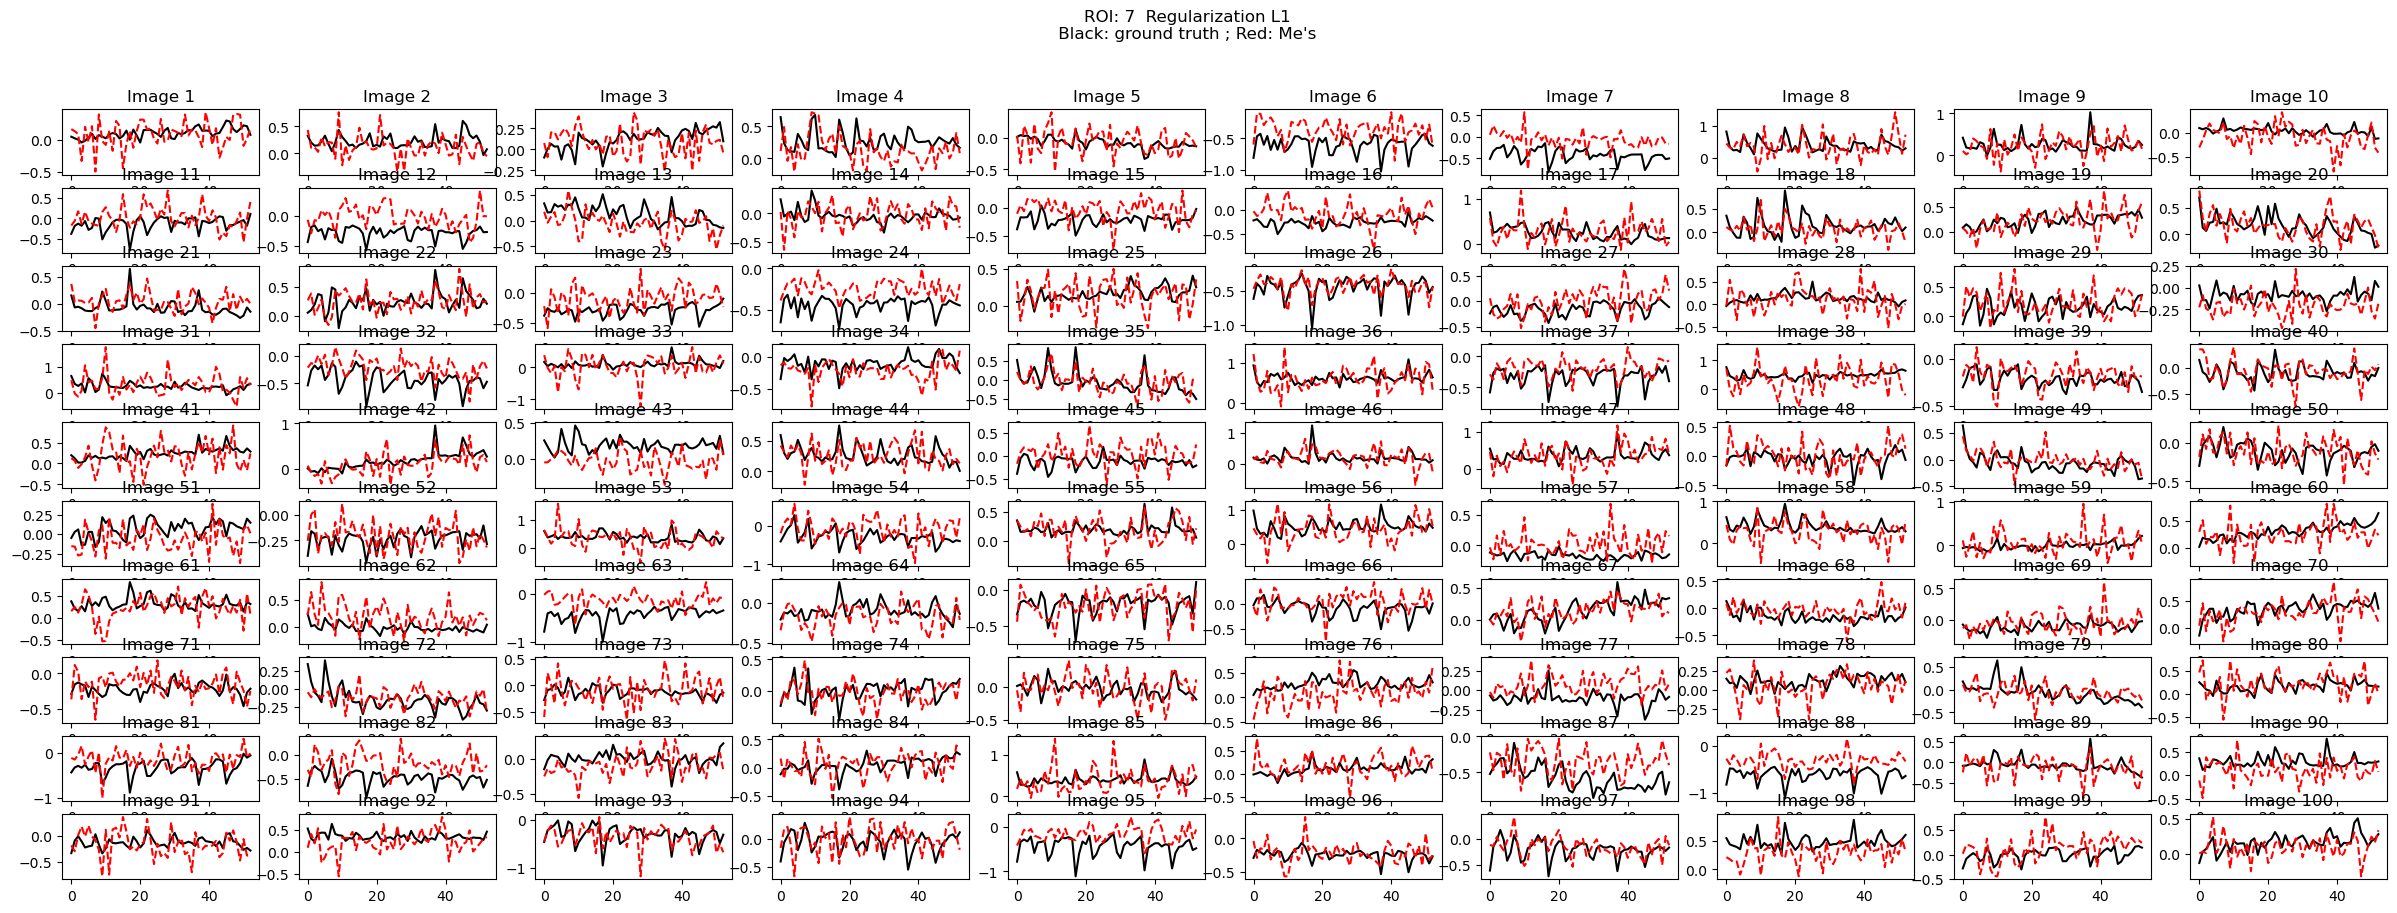

(53,)
[0.79548871 0.48568209 0.3855938  0.7136125  0.38420538 0.67398342
 0.68911235 0.54426802 0.57604269 0.5795966  0.36905063 0.51540013
 0.59911488 0.75141626 0.5014014  0.45571535 0.65560037 0.84170521
 0.68970513 0.67809089 0.62332617 0.36847964 0.68654869 0.72157577
 0.54641417 0.63281427 0.65942342 0.54479928 0.46962268 0.67304099
 0.7323666  0.68952714 0.66674118 0.7480243  0.7215187  0.58854174
 0.61000835 0.82048436 0.67894971 0.58478201 0.63561039 0.488635
 0.63159304 0.57938638 0.68351581 0.807511   0.68856487 0.58185627
 0.68002676 0.56778764 0.63948057 0.69664769 0.67473811]
32 / 53
conv_layer:   12 <class 'int'>
FTE:          [0, 2, 5, 7, 10, 12, 14, 16, 19, 21, 23, 25, 28, 30, 32, 34]
conv in FTE True



features.12
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[256, 56, 56, 53]


100%|██████████| 512/512 [00:22<00:00, 22.88it/s]



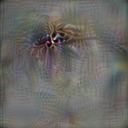
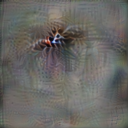
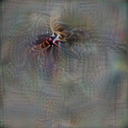
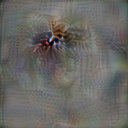
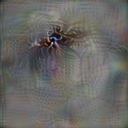

In [4]:
combination = '7_12'
position = list(dictionary_losses.keys()).index(combination)

for i in list(dictionary_losses.keys())[position:position+1]:
    torch.cuda.empty_cache()
    roi, layer = i.split('_')
    loss = dictionary_losses[i][0]
    print(roi, layer, loss)
    file = f'Vgg_model_{roi}_{layer}_*_loss_{loss}_sparsity_0.001_smoothness_0.001_groupsparsity_0.01.pt'
    file_abspath = os.path.abspath(glob('./**/'+file, recursive=1)[0])
    print(file_abspath)
    correlation_values = correlations(file_abspath)
    print(correlation_values.shape)
    print(correlation_values)
    correlation_threshold = .6
    good_neurons = np.where(correlation_values >= correlation_threshold)[0]
    
    print(good_neurons.shape[0], '/', correlation_values.shape[0])


    vgg_pretrained = vgg19(pretrained = True)
    n_neurons = neurons_per_roi[int(roi)]
    layer = int(layer)

    GPU = torch.cuda.is_available()
    gpu_to_use = 0

    net = VggModel(pretrained_model=vgg_pretrained, conv_layer=layer, num_neurons=n_neurons, device = torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu"))
    net.cuda()

    model_to_load = file_abspath
    net.load_state_dict(torch.load(model_to_load, map_location=torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu")))

    all_transforms = [
    #transform.pad(2),
    transform.jitter(8),
    transform.random_scale([n/1000. for n in range(975, 1050)]),
    transform.random_rotate(list(range(-5,5))),
    transform.jitter(4)
    ]

    param_f = lambda: param.image(128, fft=True, batch = 5, decorrelate=True)
    cppn_opt = lambda params: torch.optim.Adam(params, 1e-2, weight_decay=1e-4)
    obj = objectives.channel('output', good_neurons)
    img = render.render_vis(net, obj, param_f, cppn_opt, transforms=all_transforms, show_inline=True)




In [ ]:
for i in list(dictionary_losses.keys())[47:48]:
    torch.cuda.empty_cache()
    roi, layer = i.split('_')
    loss = dictionary_losses[i][0]
    print(roi, layer, loss)
    file = f'Vgg_model_{roi}_{layer}_*_loss_{loss}_sparsity_0.001_smoothness_0.001_groupsparsity_0.01.pt'
    file_abspath = os.path.abspath(glob('./**/'+file, recursive=1)[0])
    print(file_abspath)
    correlation_values = correlations(file_abspath)
    print(correlation_values.shape)
    print(correlation_values)
    correlation_threshold = .6
    good_neurons = np.where(correlation_values >= correlation_threshold)[0]
    
    print(good_neurons.shape[0], '/', correlation_values.shape[0])


    vgg_pretrained = vgg19(pretrained = True)
    n_neurons = neurons_per_roi[int(roi)]
    layer = int(layer)

    GPU = torch.cuda.is_available()
    gpu_to_use = 0

    net = VggModel(pretrained_model=vgg_pretrained, conv_layer=layer, num_neurons=n_neurons, device = torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu"))
    net.cuda()

    model_to_load = file_abspath
    net.load_state_dict(torch.load(model_to_load, map_location=torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu")))

    all_transforms = [
    #transform.pad(2),
    transform.jitter(8),
    transform.random_scale([n/1000. for n in range(975, 1050)]),
    transform.random_rotate(list(range(-5,5))),
    transform.jitter(4)
    ]

    param_f = lambda: param.image(128, fft=True, batch = 5, decorrelate=True)
    cppn_opt = lambda params: torch.optim.Adam(params, 1e-2, weight_decay=1e-4)
    obj = objectives.channel('output', good_neurons)
    img = render.render_vis(net, obj, param_f, cppn_opt, transforms=all_transforms, show_inline=True)




12 28 0.03436415874376114
/home/jose/Desktop/lucent-things/Results/ROI_12_Layer_28/ROI_12_Layer_28_0_Vgg/Vgg_model_12_28_epoch_2_loss_0.03436415874376114_sparsity_0.001_smoothness_0.001_groupsparsity_0.01.pt


/home/jose/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jose/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


conv_layer:   28 <class 'int'>
FTE:          [0, 2, 5, 7, 10, 12, 14, 16, 19, 21, 23, 25, 28, 30, 32, 34]
conv in FTE True



features.28
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[512, 14, 14, 29]
conv_layer:   28 <class 'int'>
FTE:          [0, 2, 5, 7, 10, 12, 14, 16, 19, 21, 23, 25, 28, 30, 32, 34]
conv in FTE True



features.28
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[512, 14, 14, 29]




 0 / 37 



/home/jose/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jose/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/home/jose/Desktop/lucent-things/Results/ROI_14_Layer_30/ROI_14_Layer_30_0_Vgg/Vgg_model_14_30_epoch_4_loss_0.14055356376016528_sparsity_0.001_smoothness_0.001_groupsparsity_0.01.pt
['0.001', '0.001', '0.01.pt'] ['14', '30']
14
30
conv_layer:   30 <class 'int'>
FTE:          [0, 2, 5, 7, 10, 12, 14, 16, 19, 21, 23, 25, 28, 30, 32, 34]
conv in FTE True



features.30
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[512, 14, 14, 24]
Neuron:  0 / 24


 48%|████▊     | 248/512 [00:04<00:04, 54.27it/s]

Interrupted optimization at step 249.



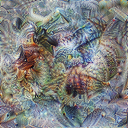

Neuron:  1 / 24


100%|██████████| 512/512 [00:07<00:00, 68.10it/s]



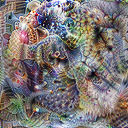

Neuron:  2 / 24


 54%|█████▎    | 275/512 [00:04<00:03, 67.69it/s]

In [ ]:
'''
gpu_to_use = 0
GPU = torch.cuda.is_available()

torch.manual_seed(0)



for MODEL_N, model in enumerate(list_of_models_to_generate_output[1:]):

    list_of_images = []

    print('\n\n', MODEL_N, '/',len(list_of_models_to_generate_output), '\n')

    vgg_pretrained = vgg19(pretrained = True)

    file_name = model.rsplit('/', 1)[-1]
    print(model)
    print(file_name.split('_')[9:14:2], file_name.split('_')[2:4])
    print(file_name.split('_')[2])
    print(file_name.split('_')[3])
    roi      = int(file_name.split('_')[2])
    layer    = int(file_name.split('_')[3])
    accuracy = np.round(float(file_name.split('_')[7]), 5)
    n_neurons = neurons_per_roi[roi]
    net = VggModel(pretrained_model=vgg_pretrained, conv_layer=layer, num_neurons=n_neurons, device=torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu"))
    net.cuda()
    net.load_state_dict(torch.load(model, map_location=torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu")))

    for neuron_i in range(0,n_neurons):
        print('Neuron: ', neuron_i,'/', n_neurons)
        img = render.render_vis(net, 'output:'+str(neuron_i), show_inline = 1)
        list_of_images.append(img[0])
    del net

    print(type(list_of_images[0]))
    print(len(list_of_images))
    print(list_of_images[0].shape)
    print('\n\n')

    f, ax = plt.subplots(n_neurons//10+1, 10, figsize = (10,n_neurons//10+1))

    f.suptitle('Roi: '+str(roi)+' Layer:'+str(layer)+'   Accuracy: '+str(accuracy))

    for i in range(len(list_of_images)):
        ax[i//10, i%10].imshow(np.array(list_of_images[i])[0,:,:,:])
        ax[i//10, i%10].axis('off')
            
    for i in range(len(list_of_images), (n_neurons//10+1)*10):
            f.delaxes(ax[i//10, i%10])

    plt.savefig('/home/jose/Desktop/Images/Vgg_reconstruction_roi_'+str(roi)+'_'+str(layer)+'_accuracy_'+str(accuracy)+'.png', dpi = 150)
    '''
    

In [ ]:
'''
f, ax = plt.subplots(6, 10, figsize = (10,6))

f.suptitle('Roi: '+str(roi)+' Layer:'+str(layer)+'   Accuracy: '+str(accuracy))

for i in range(len(list_of_images)):
    ax[i//10, i%10].imshow(np.array(list_of_images[i])[0,:,:,:])
    ax[i//10, i%10].axis('off')
        
for i in range(len(list_of_images), 60):
        f.delaxes(ax[i//10, i%10])

plt.savefig('/home/jose/Desktop/Images/Vgg_reconstruction_roi_'+str(roi)+'_'+str(layer)+'_accuracy_'+str(accuracy)+'.png', dpi = 150)
'''

"\nf, ax = plt.subplots(6, 10, figsize = (10,6))\n\nf.suptitle('Roi: '+str(roi)+' Layer:'+str(layer)+'   Accuracy: '+str(accuracy))\n\nfor i in range(len(list_of_images)):\n    ax[i//10, i%10].imshow(np.array(list_of_images[i])[0,:,:,:])\n    ax[i//10, i%10].axis('off')\n        \nfor i in range(len(list_of_images), 60):\n        f.delaxes(ax[i//10, i%10])\n\nplt.savefig('/home/jose/Desktop/Images/Vgg_reconstruction_roi_'+str(roi)+'_'+str(layer)+'_accuracy_'+str(accuracy)+'.png', dpi = 150)\n"